In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('bank_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [4]:
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1
40840,45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0


In [5]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [7]:
df.corr()['response_binary'].sort_values(ascending=False)

response_binary    1.000000
duration           0.400681
Unnamed: 0         0.293205
previous           0.128274
pdays              0.108554
balance            0.069456
age                0.023204
day               -0.035323
campaign          -0.072495
Name: response_binary, dtype: float64

In [8]:
X=df[['age','balance','day','duration','campaign','pdays','previous']]
y=df[['response_binary']]

In [9]:
#num_atr --> Numerical attributes
#cat_atr --> Categorical attributes
num_atr=['balance','day','duration','campaign','pdays','previous']

cat_atr=['job','marital','education','default', 'housing','loan','month','poutcome']

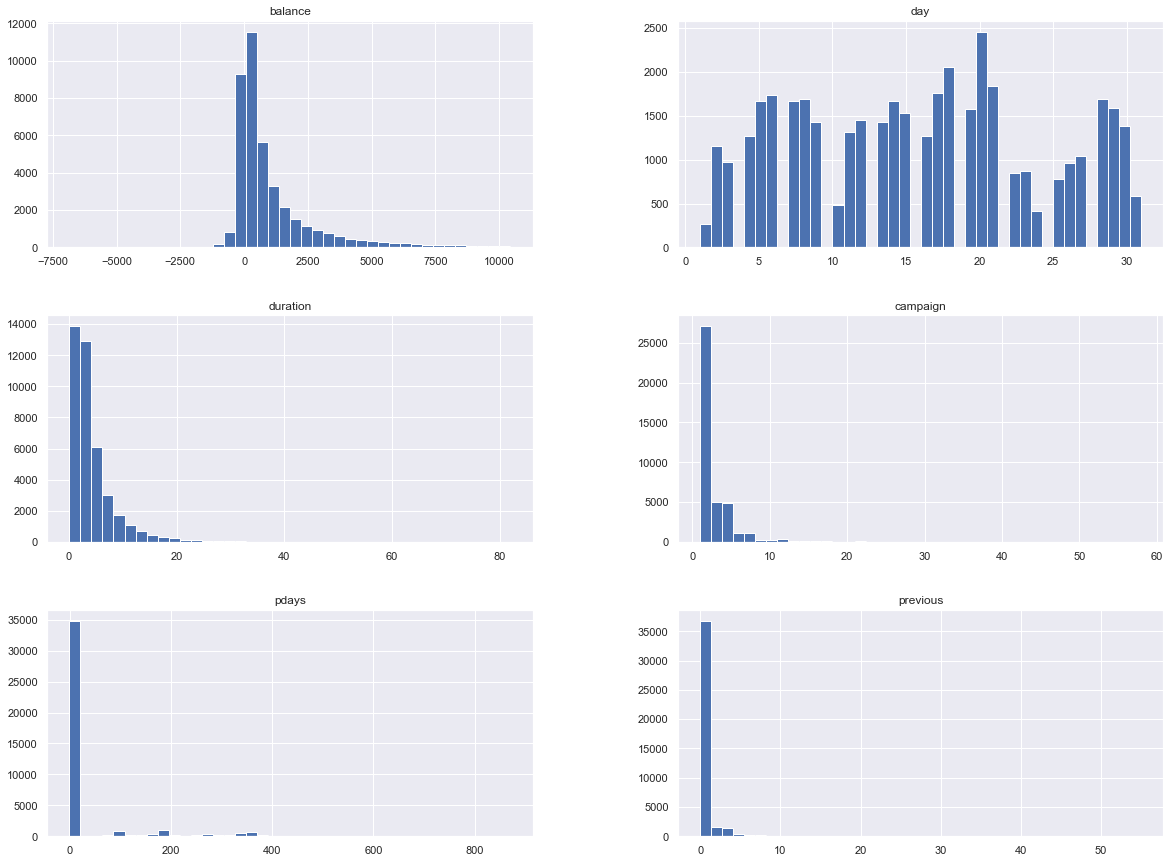

In [10]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()



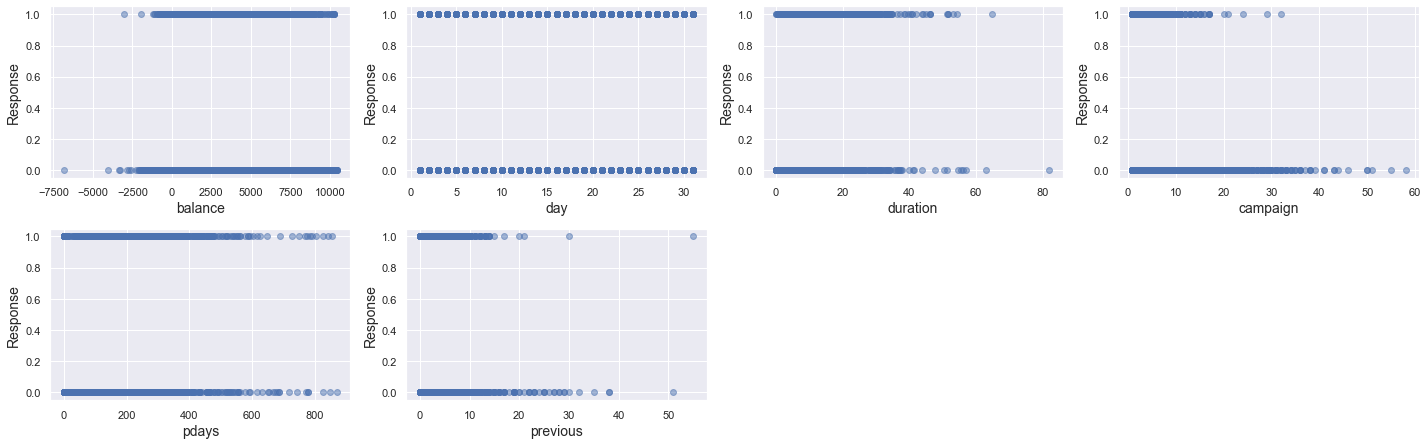

In [11]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=df,y='response_binary',x=i,alpha=0.5)
    plt.ylabel('Response',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

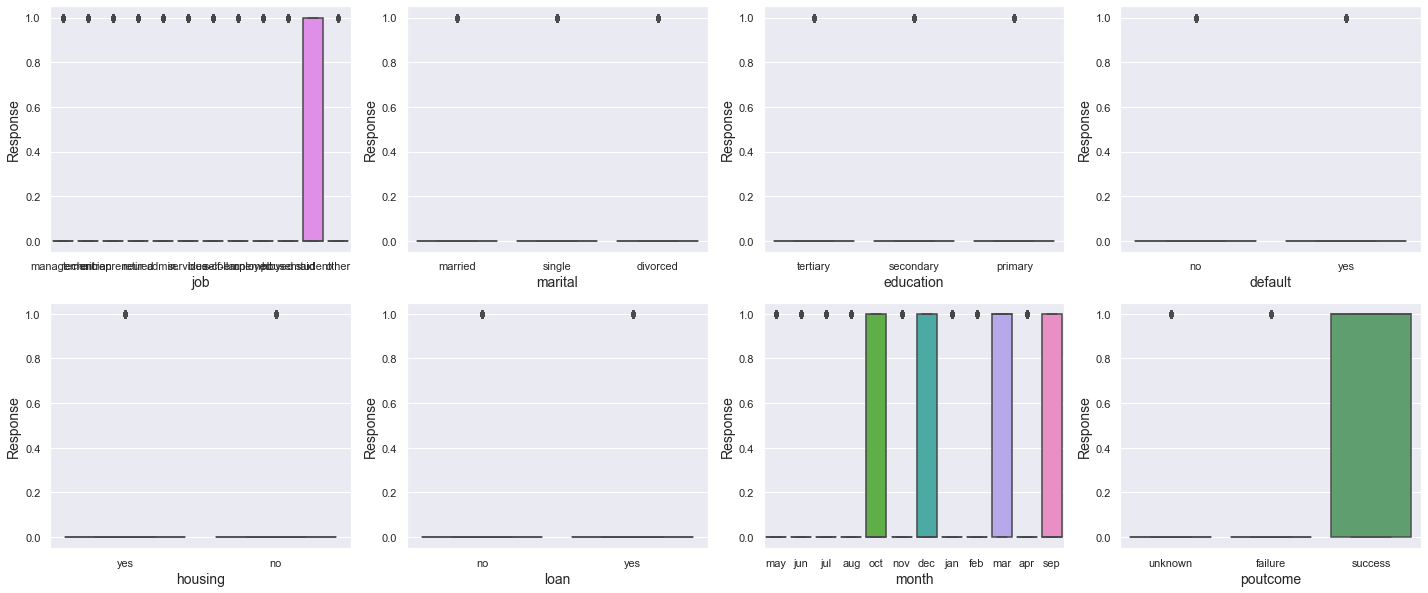

In [12]:
plt.figure(figsize=(20,12))
x=1
for i in cat_atr:
    plt.subplot(3,4,x)
    sns.boxplot(data=df,y='response_binary',x=i)
    plt.ylabel('Response',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[ 1.9896244 , -0.58257944,  2.07796948,  0.70583799, -0.36707161,
        -0.27526672],
       [-0.12941615, -1.66780036, -0.7103261 , -0.25313905, -0.36707161,
        -0.27526672],
       [-0.56201696, -0.82373964, -0.96085515,  1.025497  , -0.36707161,
        -0.27526672],
       ...,
       [-0.31699374,  0.86438179,  1.13848553, -0.25313905, -0.36707161,
        -0.27526672],
       [-0.6223935 , -1.06489985, -0.54330673, -0.57279806, -0.36707161,
        -0.27526672],
       [-0.61008372, -0.94431975, -0.2626214 , -0.25313905,  3.68133962,
         0.3531933 ]])

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [16]:
y_pred = knn.predict(X_test)

In [17]:
confusion_matrix(y_test, y_pred)

array([[8819,  214],
       [ 968,  210]])

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, y_pred)

0.8842424835961218

In [20]:
from sklearn.metrics import precision_recall_fscore_support

In [21]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.90109329, 0.49528302]),
 array([0.97630909, 0.17826825]),
 array([0.93719447, 0.26217228]),
 array([9033, 1178]))

In [22]:
from sklearn.metrics import precision_score

In [23]:
precision_score(y_test, y_pred)

0.49528301886792453

In [24]:
from sklearn.metrics import recall_score

In [25]:
recall_score(y_test, y_pred)

0.17826825127334464

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_test, y_pred)

0.26217228464419473

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19, metric='euclidean')
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)